# Cross-sell PredictionPredict Health Insurance Owners' who will be interested in Vehicle Insurance

In [97]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Importing dataset

In [2]:

data=pd.read_csv('train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
data.shape

(381109, 12)

In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# EDA

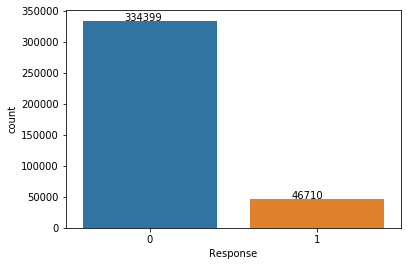

In [130]:
ax=sns.countplot(data['Response'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))


### Customer age distribution
#### Most of the customer are in 20-30 age group

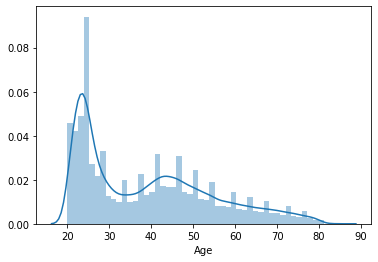

In [102]:
sns.distplot(data['Age'])

#### But the positive response  received from varied age group, shows age group 35-50 have high conversion rate

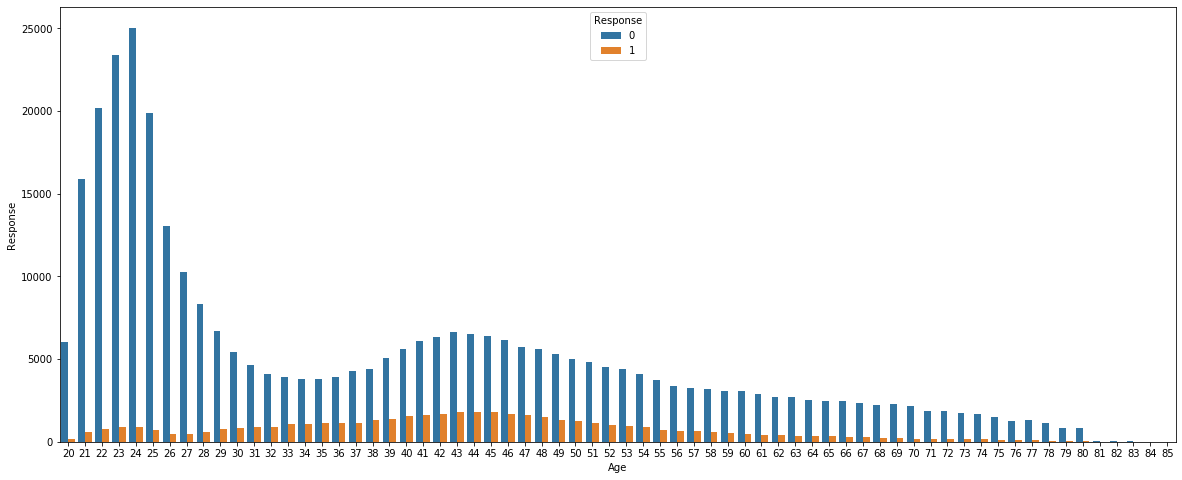

In [124]:
plt.figure(figsize=(20,8))
ax= sns.countplot(data['Age'],hue=data['Response'])
plt.ylabel('Response')
plt.show()

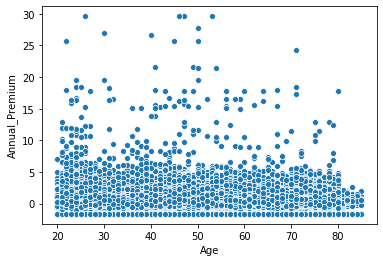

In [105]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])

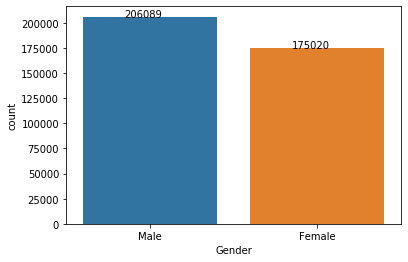

In [133]:
ax=sns.countplot(data['Gender'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

In [117]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


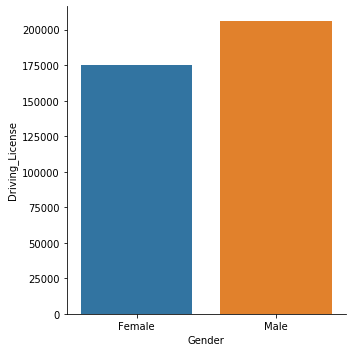

In [119]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar")

#### customer that were previously not insured most of turn positive response for vehicle insurance

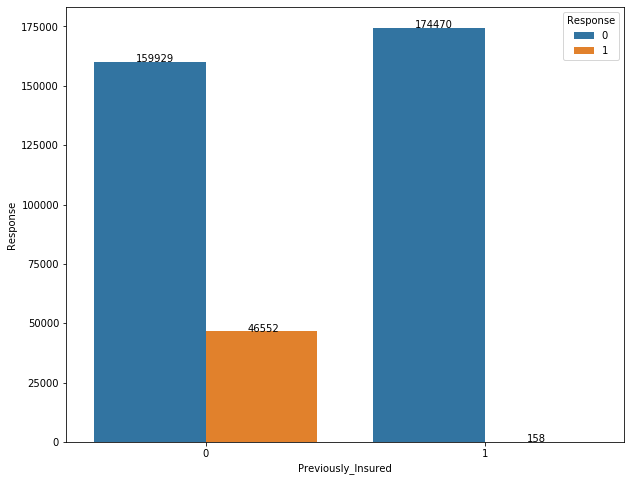

In [120]:
plt.figure(figsize=(10,8))
ax= sns.countplot(data['Previously_Insured'],hue=data['Response'])
plt.ylabel('Response')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

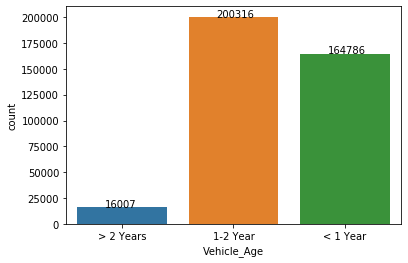

In [136]:
ax=sns.countplot(data['Vehicle_Age'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

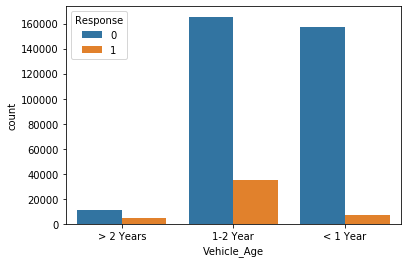

In [123]:
sns.countplot(data['Vehicle_Age'],hue=data['Response'])

#### Customer with vehicle age 1-2 years responded positive for vehicle insurance

In [16]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

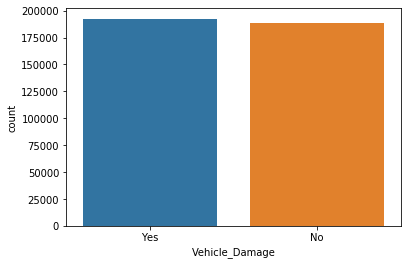

In [17]:
sns.countplot(data['Vehicle_Damage'])

#### Customer whose vehicle was damage responded positive 

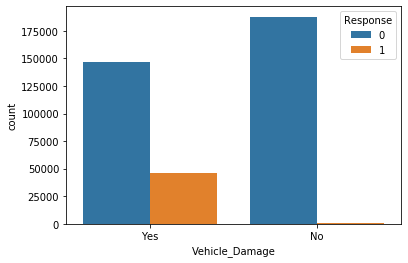

In [138]:
sns.countplot(data['Vehicle_Damage'],hue=data['Response'])

#### Customer with driving license  responded positive than those who dont own

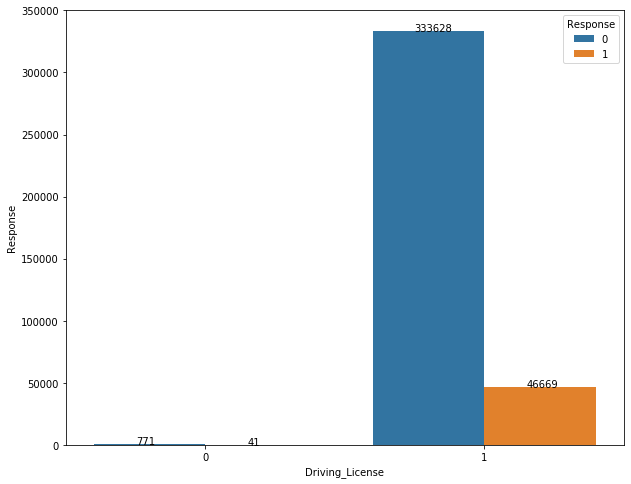

In [128]:
plt.figure(figsize=(10,8))
ax= sns.countplot(data['Driving_License'],hue=data['Response'])
plt.ylabel('Response')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

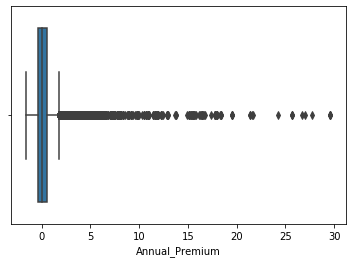

In [127]:
sns.boxplot(data['Annual_Premium'])

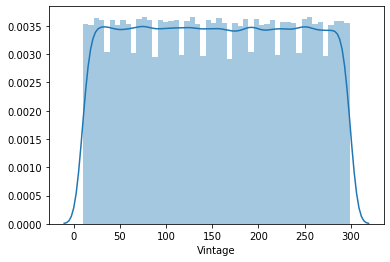

In [30]:
sns.distplot(data['Vintage'])

In [90]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [140]:
c=data['Response'].value_counts()

In [141]:
(c[1]/(c[1]+c[0]))*100

12.256336113815209

#### Data is imbalance as 12% response are positive 

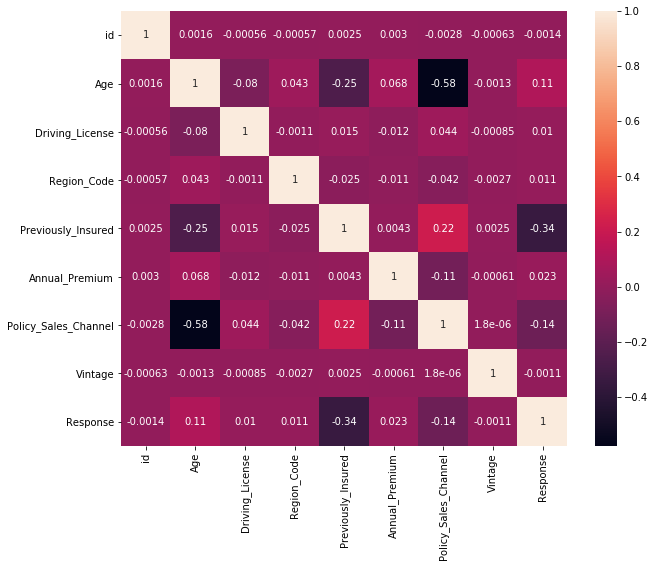

In [89]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

## Data preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()

Numfeature = [
    'Annual_Premium',
    'Vintage',
]

for x in Numfeature :
    data[[x]] = Scale.fit_transform(data[[x]])

In [32]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,0.574539,26.0,0.748795,1
1,2,Male,76,1,3.0,0,1-2 Year,No,0.172636,26.0,0.342443,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,0.449053,26.0,-1.521998,1
3,4,Male,21,1,11.0,1,< 1 Year,No,-0.113018,152.0,0.581474,0
4,5,Female,29,1,41.0,1,< 1 Year,No,-0.178259,152.0,-1.378580,0


In [33]:
traindata=data

In [34]:
traindata.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,0.574539,26.0,0.748795,1
1,2,Male,76,1,3.0,0,1-2 Year,No,0.172636,26.0,0.342443,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,0.449053,26.0,-1.521998,1
3,4,Male,21,1,11.0,1,< 1 Year,No,-0.113018,152.0,0.581474,0
4,5,Female,29,1,41.0,1,< 1 Year,No,-0.178259,152.0,-1.378580,0


In [35]:
traindata=traindata.rename(columns={"Previously_Insured": "Previously_Insured_Yes"})

In [36]:
train_dummies = pd.get_dummies(data[['Gender',
    'Vehicle_Damage',    
    'Vehicle_Age'
]],drop_first=True)

traindata = pd.concat([traindata, train_dummies], axis=1)
traindata.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured_Yes,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28.0,0,> 2 Years,Yes,0.574539,26.0,0.748795,1,1,1,0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,0.172636,26.0,0.342443,0,1,0,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,0.449053,26.0,-1.521998,1,1,1,0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,-0.113018,152.0,0.581474,0,1,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,-0.178259,152.0,-1.378580,0,0,0,1,0


In [37]:
traindata = traindata.drop([
    'id', 
    'Gender',
    'Vehicle_Age',
    'Vehicle_Damage',
       
    
], axis=1)
traindata.head()

,Age,Driving_License,Region_Code,Previously_Insured_Yes,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,28.0,0,0.574539,26.0,0.748795,1,1,1,0,1
1,76,1,3.0,0,0.172636,26.0,0.342443,0,1,0,0,0
2,47,1,28.0,0,0.449053,26.0,-1.521998,1,1,1,0,1
3,21,1,11.0,1,-0.113018,152.0,0.581474,0,1,0,1,0
4,29,1,41.0,1,-0.178259,152.0,-1.378580,0,0,0,1,0


## Test-Train Split

In [38]:
from sklearn.model_selection import train_test_split
split = traindata

y = split['Response'].values
X = split.drop(labels = ['Response'], axis = 1)


# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training dataset ', X_train.shape)
print('Shape of test dataset ', X_test.shape)

Shape of training dataset  (304887, 11)
Shape of test dataset  (76222, 11)


## Model Building- Random Forest( hyperparameter tuning)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'max_depth': [1, 2, 5, 10],
    'max_features': [2,3,4, 5],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [46]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [47]:
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [48]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 37.9min finished


Wall time: 37min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [50]:
rf_best.feature_importances_

array([0.12507745, 0.00085486, 0.01981101, 0.15786024, 0.02337403,
       0.05774293, 0.01694692, 0.00349993, 0.46957374, 0.10446567,
       0.02079321])

In [53]:
from sklearn import metrics 

In [54]:
metrics.accuracy_score(y_train, rf_best.predict(X_train))

0.8774332785589415

In [81]:
c=metrics.confusion_matrix(y_train, rf_best.predict(X_train))
c

array([[267289,     58],
       [ 37311,    229]], dtype=int64)

In [56]:
actuals=y_train
probs=rf_best.predict(X_train)

In [57]:
fpr, tpr, thresholds = metrics.roc_curve( actuals, probs,
                                              drop_intermediate = False )

In [60]:
metrics.roc_auc_score( y_train,rf_best.predict(X_train) )

0.502941606657156

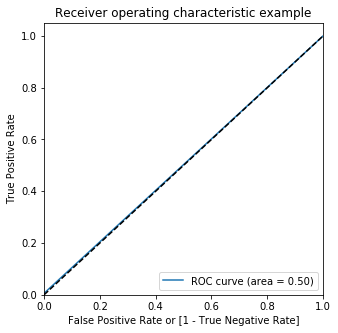

In [59]:
    auc_score = metrics.roc_auc_score( actuals, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [79]:
metrics.accuracy_score(y_test, rf_best.predict(X_test))

0.8794704940830731

In [80]:
metrics.roc_auc_score(y_test, rf_best.predict(X_test))

0.5013794320084004

In [82]:
c=metrics.confusion_matrix(y_test, rf_best.predict(X_test))
c

array([[67003,    49],
       [ 9138,    32]], dtype=int64)

### As we see ROC is 0.50 and accuracy score of train and test varies by large value so model is learning as there is class imbalance. To balance class we are using SMOTE  

#     

### Using SMOTE to balance class and make model learn using random forest grid search CV

In [62]:
from imblearn.over_sampling import SMOTE

In [66]:

X_resampled, y_resampled=SMOTE().fit_resample(X_train,y_train)

In [74]:
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 72.7min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [75]:
rf = grid_search.best_estimator_
rf

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [76]:
metrics.accuracy_score(y_resampled, rf.predict(X_resampled))

0.8086606545051936

In [83]:
c=metrics.confusion_matrix(y_resampled, rf.predict(X_resampled))
c

array([[181844,  85503],
       [ 16805, 250542]], dtype=int64)

In [77]:
actuals=y_resampled
probs=rf.predict(X_resampled)

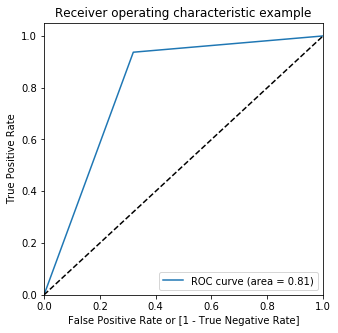

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( actuals, probs,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( actuals, probs )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [84]:
metrics.accuracy_score(y_test, rf.predict(X_test))

0.7087848652619978

In [86]:
metrics.roc_auc_score(y_test, rf.predict(X_test))

0.7940471728805542